In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv('LaundryData_2021_T2.csv')
#showing our initial dataframe here
dataframe

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,NaN,male,thin,32.0,no,no_kids,big,NaN,...,short_sleeve,blue_jeans,long,NaN,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,NaN,4,10,no,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,NaN,34.0,no,no_kids,big,blue,...,NaN,white,long,clothes,3,9,NaN,2.903530,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.643060,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.136530,101.699091,1.0


In [2]:
dataframe.isnull().sum()

Date                0
Time                0
Race              198
Gender            177
Body_Size         183
Age_Range         143
With_Kids         186
Kids_Category      30
Basket_Size       205
Basket_colour     203
Attire            217
Shirt_Colour      174
shirt_type        185
Pants_Colour      174
pants_type          9
Wash_Item         181
Washer_No           0
Dryer_No            0
Spectacles        209
latitude            0
longitude           0
Num_of_Baskets    182
dtype: int64

In [3]:
dataframe.isnull().sum() * 100 / len(dataframe)

Date              0.000
Time              0.000
Race              4.950
Gender            4.425
Body_Size         4.575
Age_Range         3.575
With_Kids         4.650
Kids_Category     0.750
Basket_Size       5.125
Basket_colour     5.075
Attire            5.425
Shirt_Colour      4.350
shirt_type        4.625
Pants_Colour      4.350
pants_type        0.225
Wash_Item         4.525
Washer_No         0.000
Dryer_No          0.000
Spectacles        5.225
latitude          0.000
longitude         0.000
Num_of_Baskets    4.550
dtype: float64

In [4]:
dataframe.dtypes

Date               object
Time               object
Race               object
Gender             object
Body_Size          object
Age_Range         float64
With_Kids          object
Kids_Category      object
Basket_Size        object
Basket_colour      object
Attire             object
Shirt_Colour       object
shirt_type         object
Pants_Colour       object
pants_type         object
Wash_Item          object
Washer_No           int64
Dryer_No            int64
Spectacles         object
latitude          float64
longitude         float64
Num_of_Baskets    float64
dtype: object

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [7]:
imputed_data = imp.fit_transform(dataframe)

In [8]:
dataframe = pd.DataFrame(imputed_data, columns = dataframe.columns)

In [9]:
dataframe

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,malay,male,thin,32.0,no,no_kids,big,white,...,short_sleeve,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,clothes,4,10,no,2.935533,101.73717,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,big,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,short_sleeve,white,long,clothes,3,9,no,2.90353,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.64306,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.13653,101.699091,1.0


In [10]:
dataframe.isnull().sum()

Date              0
Time              0
Race              0
Gender            0
Body_Size         0
Age_Range         0
With_Kids         0
Kids_Category     0
Basket_Size       0
Basket_colour     0
Attire            0
Shirt_Colour      0
shirt_type        0
Pants_Colour      0
pants_type        0
Wash_Item         0
Washer_No         0
Dryer_No          0
Spectacles        0
latitude          0
longitude         0
Num_of_Baskets    0
dtype: int64

In [11]:
dataframe['Age_Range'] = dataframe.Age_Range.astype(float)
dataframe['Washer_No'] = dataframe.Washer_No.astype(np.int64)
dataframe['Dryer_No'] = dataframe.Dryer_No.astype(np.int64)
dataframe['latitude'] = dataframe.latitude.astype(float)
dataframe['longitude'] = dataframe.longitude.astype(float)
dataframe['Num_of_Baskets'] = dataframe.Num_of_Baskets.astype(float)

In [12]:
dataframe.dtypes

Date               object
Time               object
Race               object
Gender             object
Body_Size          object
Age_Range         float64
With_Kids          object
Kids_Category      object
Basket_Size        object
Basket_colour      object
Attire             object
Shirt_Colour       object
shirt_type         object
Pants_Colour       object
pants_type         object
Wash_Item          object
Washer_No           int64
Dryer_No            int64
Spectacles         object
latitude          float64
longitude         float64
Num_of_Baskets    float64
dtype: object

<AxesSubplot:>

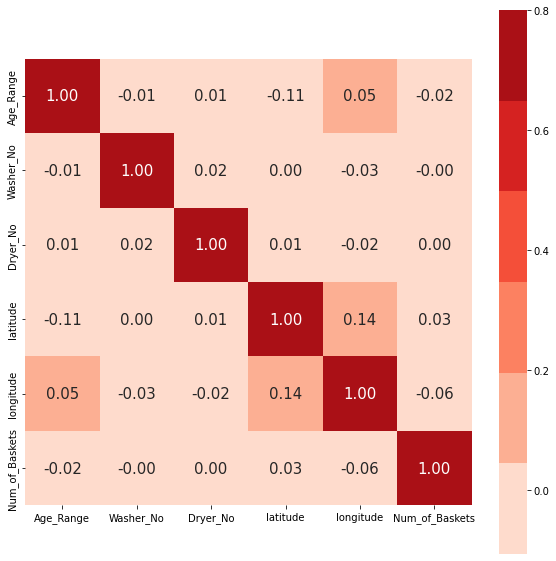

In [13]:
cor = dataframe.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))